# Various Plots For Final Report

## Setup

In [ ]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import modelinghelper as helper
import imblearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score
from adspy_shared_utilities import plot_feature_importances
#from adspy_shared_utilities import plot_decision_tree
import lightgbm

import joblib
import os
from datetime import datetime

# supress future warnings
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from adspy_shared_utilities import plot_feature_importances
from adspy_shared_utilities import plot_decision_tree
import matplotlib.pyplot as plt
import joblib

In [ ]:
#set up random seed
rng = 42

In [ ]:
# bring in data and setup for test data
p = '../data/'
input_name = 'cleaned.csv'
df = pd.read_csv(f'{p}{input_name}')
# convert month to string
df['ship_date_mm'] = df['ship_date_mm'].astype(str)

non_feature_cols = ['control_number', 'disp_date', 'i_e', 'ship_date',
                    'cartons', 'qty', 'unit', 'specific_generic_name',
                    'genus', 'species', 'wildlf_cat',
                    'disp_date_yyyy', 'disp_date_mm', 'disp_ship_date']

target = ['act', 'dp_cd']

feature_cols = ['species_code', 'wildlf_desc', 'wildlf_cat',
                'ctry_org', 'ctry_ie', 'purp', 'src', 'trans_mode', 'pt_cd',
                'value', 'ship_date_mm']

import_df = helper.df_filtering(df, i_e='I', f_cols=feature_cols)
export_df = helper.df_filtering(df, i_e='E', f_cols=feature_cols)
import_X_train, import_X_test, import_y_train, import_y_test = helper.data_split(import_df)
export_X_train, export_X_test, export_y_train, export_y_test = helper.data_split(export_df)

In [ ]:
# read in the joblibs
path = "gridsearch_all_models"
# logistic regression
export_lr_pipe = joblib.load(f'{path}/export_lr_pipe.joblib')
export_smote_lr_pipe = joblib.load(f'{path}/export_SMOTE_lr_pipe.joblib')
import_lr_pipe = joblib.load(f'{path}/import_lr_pipe.joblib')
import_smote_lr_pipe = joblib.load(f'{path}/export_SMOTE_lr_pipe.joblib')
# decision tree
export_dt_pipe = joblib.load(f'{path}/export_dt_pipe.joblib')
export_smote_dt_pipe = joblib.load(f'{path}/export_SMOTE_dt_pipe.joblib')
import_dt_pipe = joblib.load(f'{path}/import_dt_pipe.joblib')
import_smote_dt_pipe = joblib.load(f'{path}/import_SMOTE_dt_pipe.joblib')
# random forest
export_rf_pipe = joblib.load(f'{path}/export_rf_pipe.joblib')
export_smote_rf_pipe = joblib.load(f'{path}/export_SMOTE_rf_pipe.joblib')
import_rf_pipe = joblib.load(f'{path}/import_rf_pipe.joblib')
import_smote_rf_pipe = joblib.load(f'{path}/import_SMOTE_rf_pipe.joblib')
# lgbm
export_lgbm_pipe = joblib.load(f'{path}/lgbm_export.joblib')
export_smote_lgbm_pipe = joblib.load(f'{path}/lgbm_export_SMOTE.joblib')
import_lgbm_pipe = joblib.load(f'{path}/lgbm_pipe_import.joblib')
import_smote_lgbm_pipe = joblib.load(f'{path}/lgbm_import_SMOTE.joblib')

In [ ]:
# smote testing


In [ ]:
def plot_feature_importances_lgbm(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), (clf.feature_importances_)/sum(clf.feature_importances_))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.xlim(0,1)
    plt.yticks(np.arange(c_features), feature_names)

In [ ]:
model_names = ['Logistic Regression', 'Logistic Regression (SMOTE)',
               'Decision Tree', 'Decision Tree (SMOTE)',
               'Random Forest', 'Random Forest (SMOTE)',
               'LightGBM', 'LightGBM (SMOTE)']

ex_lst = [export_lr_pipe, export_smote_lr_pipe, 
              export_dt_pipe, export_smote_dt_pipe, 
              export_rf_pipe, export_smote_rf_pipe, 
              export_lgbm_pipe, export_smote_lgbm_pipe]
im_lst = [import_lr_pipe, import_smote_lr_pipe,
         import_dt_pipe, import_smote_dt_pipe,
         import_rf_pipe, import_smote_rf_pipe,
         import_lgbm_pipe, import_smote_lgbm_pipe]

## Confusion Matrix Plots (Export)

In [ ]:
plt.figure(figsize=(8,12))
plt.subplots_adjust(hspace=0.75)
#plt.suptitle("Export Models Confusion Matrix", fontsize=20, x=.55)


# export
for idx, m in enumerate(ex_lst):
    # add subplot
    ax = plt.subplot(4,2, idx+1)
    # predict and create confusion matrix
    export_pred = m.predict(export_X_test)
    confusion = confusion_matrix(export_y_test, export_pred, labels = [1,0])
    ConfusionMatrixDisplay(confusion, display_labels=[1,0]).plot(ax=ax)
    # change labels
    ax.set_title(model_names[idx])
    
    

## Confusion Matrix Plots (Import)

In [ ]:
plt.figure(figsize=(8,12))
plt.subplots_adjust(hspace=0.75)
#plt.suptitle("Import Models Confusion Matrix", fontsize=20, x=.55)


# export
for idx, m in enumerate(im_lst):
    # add subplot
    ax = plt.subplot(4,2, idx+1)
    # predict and create confusion matrix
    import_pred = m.predict(import_X_test)
    confusion = confusion_matrix(import_y_test, import_pred, labels = [1,0])
    ConfusionMatrixDisplay(confusion, display_labels=[1,0]).plot(ax=ax)
    # change labels
    ax.set_title(model_names[idx])

## Feature Importance Export

In [ ]:
ex_lst_noreg = [export_dt_pipe, export_smote_dt_pipe, 
              export_rf_pipe, export_smote_rf_pipe, 
              export_lgbm_pipe, export_smote_lgbm_pipe]
im_lst_noreg = [import_dt_pipe, import_smote_dt_pipe,
             import_rf_pipe, import_smote_rf_pipe,
             import_lgbm_pipe, import_smote_lgbm_pipe]

model_names_noreg = [
               'Decision Tree', 'Decision Tree (SMOTE)',
               'Random Forest', 'Random Forest (SMOTE)',
               'LightGBM', 'LightGBM (SMOTE)']

In [ ]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(hspace=0.5,wspace = .75)
#plt.suptitle("Export Models", fontsize=20, x=.5)


# export
for idx, m in enumerate(ex_lst_noreg):
    # add subplot
    ax = plt.subplot(3,2, idx+1)
    # predict and create confusion matrix
    plot_feature_importances_lgbm(m.best_estimator_.named_steps['clf'], feature_cols)
    # change labels
    ax.set_title(model_names_noreg[idx])
    # fix x axis
    

## Feature Importance Import

In [ ]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(hspace=0.5,wspace = .75)
#plt.suptitle("Import Models", fontsize=20, x=.5)


# export
for idx, m in enumerate(im_lst_noreg):
    # add subplot
    ax = plt.subplot(3,2, idx+1)
    # predict and create confusion matrix
    plot_feature_importances_lgbm(m.best_estimator_.named_steps['clf'], feature_cols)
    # change labels
    ax.set_title(model_names_noreg[idx])
    # fix x axis
    

## All Models Scores

In [ ]:
# dummy classifier
from sklearn.dummy import DummyClassifier
dummy_majority_import = DummyClassifier(strategy = 'most_frequent').fit(import_X_train, import_y_train)
dummy_majority_export = DummyClassifier(strategy = 'most_frequent').fit(export_X_train, export_y_train)

In [ ]:
# recall and F1

im_all_lst = [dummy_majority_import,
                    import_lr_pipe, import_smote_lr_pipe,
                    import_dt_pipe, import_smote_dt_pipe,
                    import_rf_pipe, import_smote_rf_pipe,
                    import_lgbm_pipe, import_smote_lgbm_pipe]
ex_all_lst = [dummy_majority_export,
                    export_lr_pipe, export_smote_lr_pipe, 
                    export_dt_pipe, export_smote_dt_pipe, 
                    export_rf_pipe, export_smote_rf_pipe, 
                    export_lgbm_pipe, export_smote_lgbm_pipe]

all_model_names = ['Dummy Majority', 'Logistic Regression', 'Logistic Regression (SMOTE)',
               'Decision Tree', 'Decision Tree (SMOTE)',
               'Random Forest', 'Random Forest (SMOTE)',
               'LightGBM', 'LightGBM (SMOTE)']

# export
export_f1 = []
export_recall = []
for m in ex_all_lst:
    ex_pred = m.predict(export_X_test)
    export_f1.append(f1_score(export_y_test, ex_pred))
    export_recall.append(recall_score(export_y_test, ex_pred))

# import
import_f1 = []
import_recall = []
for m in im_all_lst:
    im_pred = m.predict(import_X_test)
    import_f1.append(f1_score(import_y_test, im_pred))
    import_recall.append(recall_score(import_y_test, im_pred))

In [ ]:
f1_score(export_y_test,dummy_majority_export.predict(export_X_test))

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(rows=2,cols=1, subplot_titles=("Exports","Imports"), vertical_spacing=.25)

# export
trace1 = go.Bar(name='F1 Score', x=all_model_names, y=export_f1, marker_color="#636efa")
trace2 = go.Bar(name='Recall', x=all_model_names, y=export_recall, marker_color="#ab63fa")
# import
trace3 = go.Bar(showlegend=False, x=all_model_names, y=import_f1, marker_color="#636efa")
trace4 = go.Bar(showlegend=False, x=all_model_names, y=import_recall, marker_color="#ab63fa")

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,1)

fig.append_trace(trace3, 2,1)
fig.append_trace(trace4, 2,1)

fig.update_layout(height=600, width = 1600, title={"text":"Model Recall and F1 Performance", "x":.5})
fig.update_annotations(x=.02, selector={"text":"Exports"})
fig.update_annotations(x=.02, selector={"text":"Imports"})
fig.show()

In [ ]:
from sklearn import tree
import graphviz
from IPython.display import display

In [ ]:
#dot_data = tree.export_graphviz(export_dt_pipe.best_estimator_.named_steps['clf'], out_file=None) 
dot_data = tree.export_graphviz(import_dt_pipe.best_estimator_.named_steps['clf'], out_file=None, 
                                feature_names=feature_cols,
                                class_names=["Clear","Seize"],
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("import_dt")

In [ ]:
import_lgbm_pipe

In [ ]:
col_names = ["Data Set","Metric"] + all_model_names
row1 = ["Import","

In [ ]:
score_df = pd.DataFrame(columns=col_names)
row1 = ['Export','F1'] + export_f1
row2 = ['Export','Recall'] + export_recall
row3 = ['Import', 'F1'] + import_f1
row4 = ['Import','Recall'] + import_recall
score_df.loc[len(score_df)] = row1
score_df.loc[len(score_df)] = row2
score_df.loc[len(score_df)] = row3
score_df.loc[len(score_df)] = row4
score_df.round(3)

In [ ]:
import_X_test.head()

In [ ]:
# # read in the joblibs
# path = "gridsearch_all_models"
# # logistic regression
# export_lr_pipe = joblib.load(f'{path}/export_lr_pipe.joblib')
# export_smote_lr_pipe = joblib.load(f'{path}/export_SMOTE_lr_pipe.joblib')
# import_lr_pipe = joblib.load(f'{path}/import_lr_pipe.joblib')
# import_smote_lr_pipe = joblib.load(f'{path}/export_SMOTE_lr_pipe.joblib')
# # decision tree
# export_dt_pipe = joblib.load(f'{path}/export_dt_pipe.joblib')
# export_smote_dt_pipe = joblib.load(f'{path}/export_SMOTE_dt_pipe.joblib')
# import_dt_pipe = joblib.load(f'{path}/import_dt_pipe.joblib')
# import_smote_dt_pipe = joblib.load(f'{path}/import_SMOTE_dt_pipe.joblib')
# # random forest
# export_rf_pipe = joblib.load(f'{path}/export_rf_pipe.joblib')
# export_smote_rf_pipe = joblib.load(f'{path}/export_SMOTE_rf_pipe.joblib')
# import_rf_pipe = joblib.load(f'{path}/import_rf_pipe.joblib')
# import_smote_rf_pipe = joblib.load(f'{path}/import_SMOTE_rf_pipe.joblib')
# # lgbm
# export_lgbm_pipe = joblib.load(f'{path}/lgbm_export.joblib')
# export_smote_lgbm_pipe = joblib.load(f'{path}/lgbm_export_SMOTE.joblib')
# import_lgbm_pipe = joblib.load(f'{path}/lgbm_pipe_import.joblib')
# import_smote_lgbm_pipe = joblib.load(f'{path}/lgbm_import_SMOTE.joblib') # still running

In [ ]:
# imports
# regression
import_reg_preds = import_lr_pipe.predict(import_X_test)
import_reg_smote_preds = import_smote_lr_pipe.predict(import_X_test)
# decision tree
import_dt_preds = import_dt_pipe.predict(import_X_test)
import_dt_smote_preds = import_smote_dt_pipe.predict(import_X_test)
# random forest
import_rf_preds = import_rf_pipe.predict(import_X_test)
import_rf_smote_preds = import_smote_rf_pipe.predict(import_X_test)
# lgbm
import_lgbm_preds = import_lgbm_pipe.predict(import_X_test)
import_lgbm_smote_preds = import_smote_lgbm_pipe.predict(import_X_test)
# exports
# regression
export_reg_preds = export_lr_pipe.predict(export_X_test)
export_reg_smote_preds = export_smote_lr_pipe.predict(export_X_test)
# decision tree
export_dt_preds = export_dt_pipe.predict(export_X_test)
export_dt_smote_preds = export_smote_dt_pipe.predict(export_X_test)
# random forest
export_rf_preds = export_rf_pipe.predict(export_X_test)
export_rf_smote_preds = export_smote_rf_pipe.predict(export_X_test)
# lgbm
export_lgbm_preds = export_lgbm_pipe.predict(export_X_test)
export_lgbm_smote_preds = export_smote_lgbm_pipe.predict(export_X_test)

In [ ]:
predicted_df_import = import_X_test.copy()
predicted_df_export = export_X_test.copy()
predicted_df_import['y'] = import_y_test
predicted_df_export['y'] = export_y_test

predicted_df_import['import_lr'] = import_reg_preds
predicted_df_import['import_lr_smote'] = import_reg_smote_preds
predicted_df_import['import_dt'] = import_dt_preds
predicted_df_import['import_dt_smote'] = import_dt_smote_preds
predicted_df_import['import_rf'] = import_rf_preds
predicted_df_import['import_rf_smote'] = import_rf_smote_preds
predicted_df_import['import_lgbm'] = import_lgbm_preds
predicted_df_import['import_lgbm_smote'] = import_lgbm_smote_preds


predicted_df_export['export_lr'] = export_reg_preds
predicted_df_export['export_lr_smote'] = export_reg_smote_preds
predicted_df_export['export_dt'] = export_dt_preds
predicted_df_export['export_dt_smote'] = export_dt_smote_preds
predicted_df_export['export_rf'] = export_rf_preds
predicted_df_export['export_rf_smote'] = export_rf_smote_preds
predicted_df_export['export_lgbm'] = export_lgbm_preds
predicted_df_export['export_lgbm_smote'] = export_lgbm_smote_preds

In [ ]:
predicted_df_import.head()

In [ ]:
predicted_df_export.head()

In [ ]:
predicted_df_export.shape

In [ ]:
export_err = predicted_df_export.loc[(predicted_df_export['y'] != predicted_df_export['export_lr']) | (predicted_df_export['y'] != predicted_df_export['export_lr_smote']) | 
                       (predicted_df_export['y'] != predicted_df_export['export_dt']) | (predicted_df_export['y'] != predicted_df_export['export_dt_smote']) |
                       (predicted_df_export['y'] != predicted_df_export['export_rf']) | (predicted_df_export['y'] != predicted_df_export['export_rf_smote'])|
                       (predicted_df_export['y'] != predicted_df_export['export_lgbm']) | (predicted_df_export['y'] != predicted_df_export['export_lgbm_smote'])]

In [ ]:
import_err = predicted_df_import.loc[(predicted_df_import['y'] != predicted_df_import['import_lr']) | (predicted_df_import['y'] != predicted_df_import['import_lr_smote']) | 
                       (predicted_df_import['y'] != predicted_df_import['import_dt']) | (predicted_df_import['y'] != predicted_df_import['import_dt_smote']) |
                       (predicted_df_import['y'] != predicted_df_import['import_rf']) | (predicted_df_import['y'] != predicted_df_import['import_rf_smote'])|
                       (predicted_df_import['y'] != predicted_df_import['import_lgbm']) | (predicted_df_import['y'] != predicted_df_import['import_lgbm_smote'])]

In [ ]:
export_err.to_csv("export_errors.csv")

In [ ]:
predicted_df_export.shape

In [ ]:
export_err.shape

In [ ]:
import_err.to_csv("import_errors.csv")

In [ ]:
import_err.shape

In [ ]:
predicted_df_import.loc[predicted_df_import['y']==0].shape

In [ ]:
predicted_df_import.loc[predicted_df_import['y']==1].shape

In [ ]:
predicted_df_import

In [6]:
# smote testing


In [7]:
def plot_feature_importances_lgbm(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), (clf.feature_importances_)/sum(clf.feature_importances_))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.xlim(0,1)
    plt.yticks(np.arange(c_features), feature_names)

In [77]:
model_names = ['Logistic Regression', 'Logistic Regression (SMOTE)',
               'Decision Tree', 'Decision Tree (SMOTE)',
               'Random Forest', 'Random Forest (SMOTE)',
               'LightGBM', 'LightGBM (SMOTE)']

ex_lst = [export_lr_pipe, export_smote_lr_pipe, 
              export_dt_pipe, export_smote_dt_pipe, 
              export_rf_pipe, export_smote_rf_pipe, 
              export_lgbm_pipe, export_smote_lgbm_pipe]
im_lst = [import_lr_pipe, import_smote_lr_pipe,
         import_dt_pipe, import_smote_dt_pipe,
         import_rf_pipe, import_smote_rf_pipe,
         import_lgbm_pipe, import_smote_lgbm_pipe]

## Confusion Matrix Plots (Export)

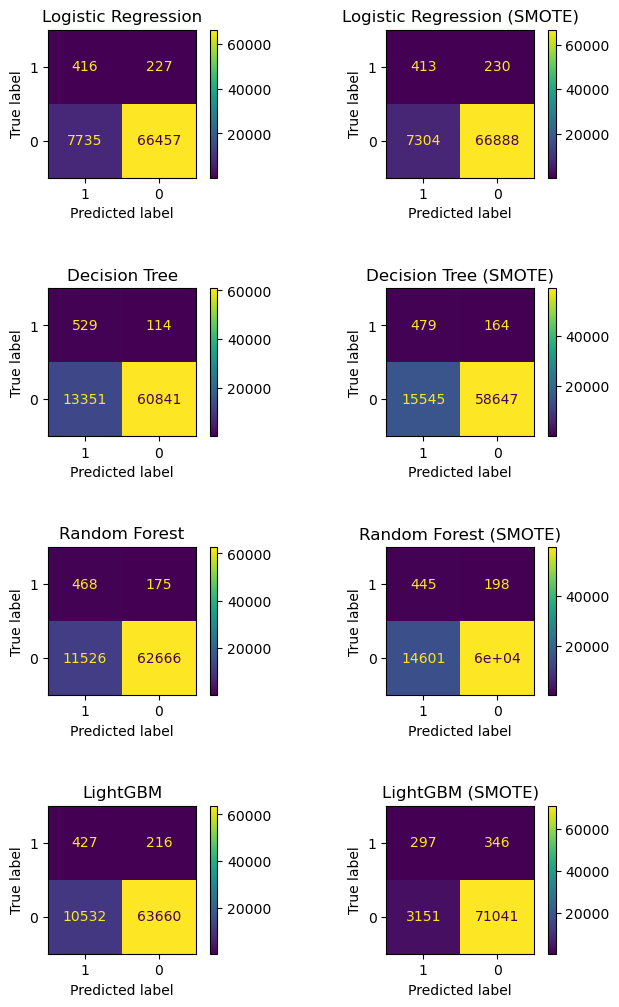

In [81]:
plt.figure(figsize=(8,12))
plt.subplots_adjust(hspace=0.75)
#plt.suptitle("Export Models Confusion Matrix", fontsize=20, x=.55)


# export
for idx, m in enumerate(ex_lst):
    # add subplot
    ax = plt.subplot(4,2, idx+1)
    # predict and create confusion matrix
    export_pred = m.predict(export_X_test)
    confusion = confusion_matrix(export_y_test, export_pred, labels = [1,0])
    ConfusionMatrixDisplay(confusion, display_labels=[1,0]).plot(ax=ax)
    # change labels
    ax.set_title(model_names[idx])
    
    

## Confusion Matrix Plots (Import)

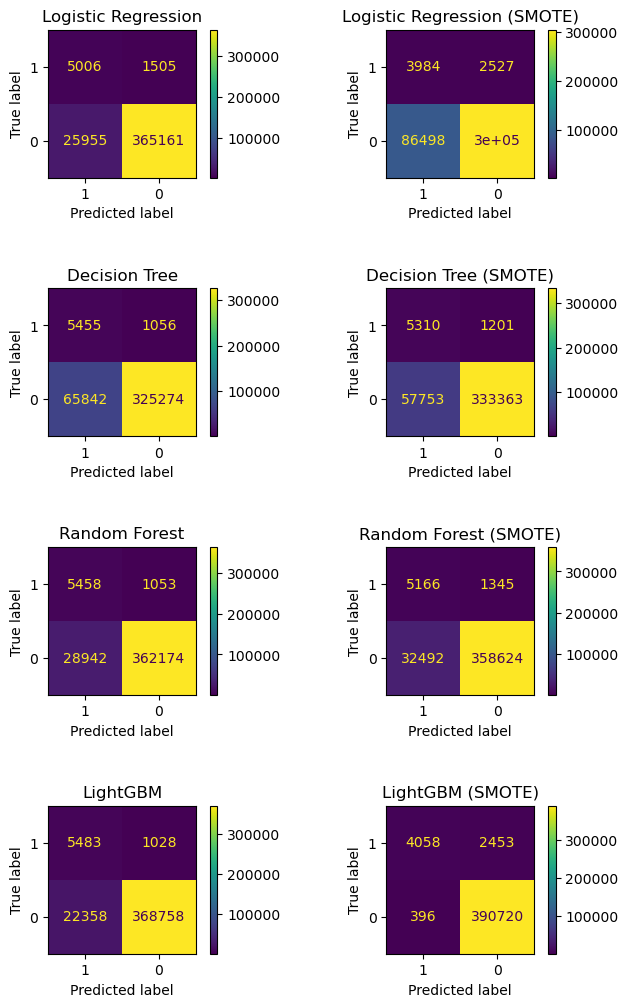

In [80]:
plt.figure(figsize=(8,12))
plt.subplots_adjust(hspace=0.75)
#plt.suptitle("Import Models Confusion Matrix", fontsize=20, x=.55)


# export
for idx, m in enumerate(im_lst):
    # add subplot
    ax = plt.subplot(4,2, idx+1)
    # predict and create confusion matrix
    import_pred = m.predict(import_X_test)
    confusion = confusion_matrix(import_y_test, import_pred, labels = [1,0])
    ConfusionMatrixDisplay(confusion, display_labels=[1,0]).plot(ax=ax)
    # change labels
    ax.set_title(model_names[idx])

## Feature Importance Export

In [82]:
ex_lst_noreg = [export_dt_pipe, export_smote_dt_pipe, 
              export_rf_pipe, export_smote_rf_pipe, 
              export_lgbm_pipe, export_smote_lgbm_pipe]
im_lst_noreg = [import_dt_pipe, import_smote_dt_pipe,
             import_rf_pipe, import_smote_rf_pipe,
             import_lgbm_pipe, import_smote_lgbm_pipe]

model_names_noreg = [
               'Decision Tree', 'Decision Tree (SMOTE)',
               'Random Forest', 'Random Forest (SMOTE)',
               'LightGBM', 'LightGBM (SMOTE)']

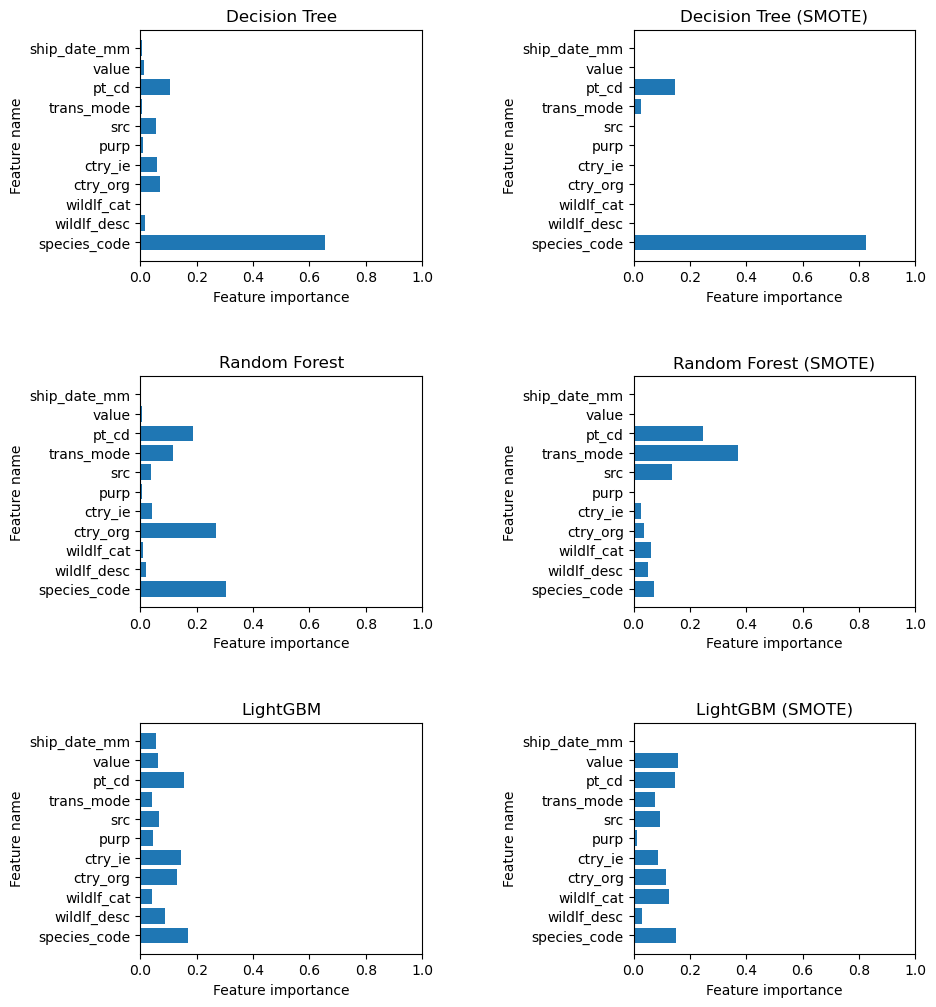

In [86]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(hspace=0.5,wspace = .75)
#plt.suptitle("Export Models", fontsize=20, x=.5)


# export
for idx, m in enumerate(ex_lst_noreg):
    # add subplot
    ax = plt.subplot(3,2, idx+1)
    # predict and create confusion matrix
    plot_feature_importances_lgbm(m.best_estimator_.named_steps['clf'], feature_cols)
    # change labels
    ax.set_title(model_names_noreg[idx])
    # fix x axis
    

## Feature Importance Import

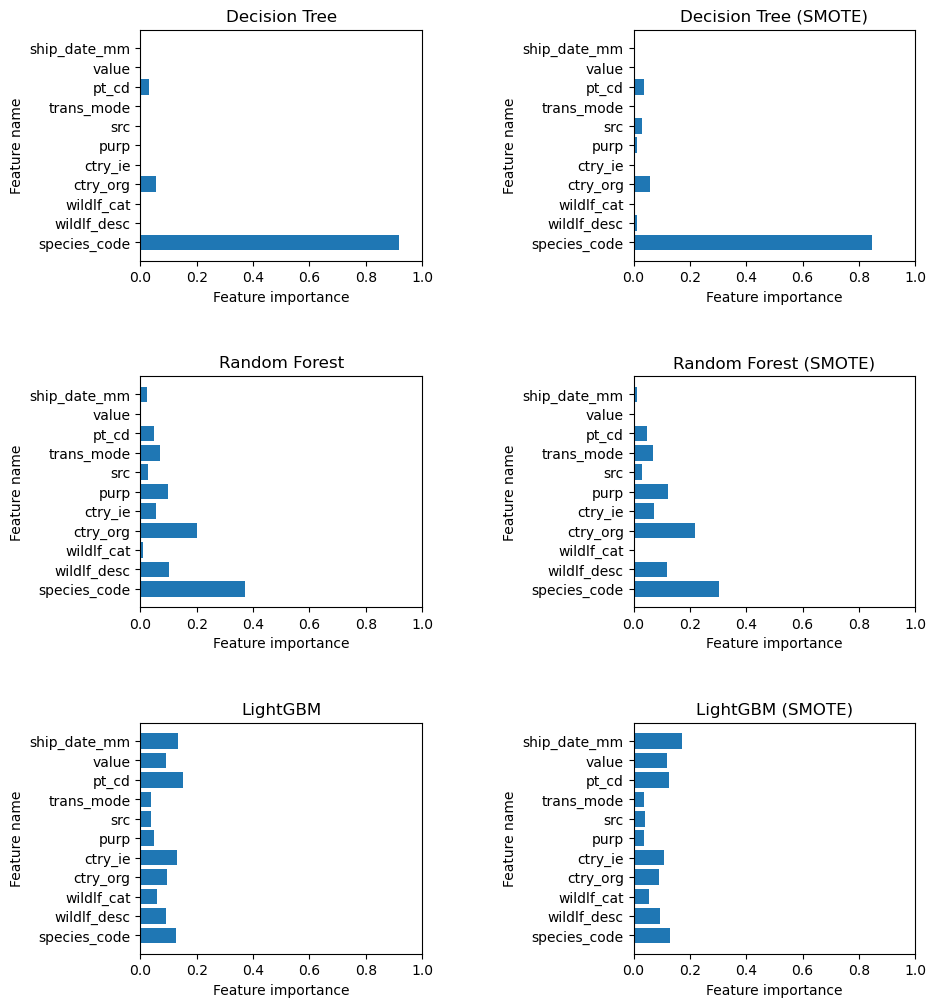

In [85]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(hspace=0.5,wspace = .75)
#plt.suptitle("Import Models", fontsize=20, x=.5)


# export
for idx, m in enumerate(im_lst_noreg):
    # add subplot
    ax = plt.subplot(3,2, idx+1)
    # predict and create confusion matrix
    plot_feature_importances_lgbm(m.best_estimator_.named_steps['clf'], feature_cols)
    # change labels
    ax.set_title(model_names_noreg[idx])
    # fix x axis
    

## All Models Scores

In [14]:
# dummy classifier
from sklearn.dummy import DummyClassifier
dummy_majority_import = DummyClassifier(strategy = 'most_frequent').fit(import_X_train, import_y_train)
dummy_majority_export = DummyClassifier(strategy = 'most_frequent').fit(export_X_train, export_y_train)

In [88]:
# recall and F1

im_all_lst = [dummy_majority_import,
                    import_lr_pipe, import_smote_lr_pipe,
                    import_dt_pipe, import_smote_dt_pipe,
                    import_rf_pipe, import_smote_rf_pipe,
                    import_lgbm_pipe, import_smote_lgbm_pipe]
ex_all_lst = [dummy_majority_export,
                    export_lr_pipe, export_smote_lr_pipe, 
                    export_dt_pipe, export_smote_dt_pipe, 
                    export_rf_pipe, export_smote_rf_pipe, 
                    export_lgbm_pipe, export_smote_lgbm_pipe]

all_model_names = ['Dummy Majority', 'Logistic Regression', 'Logistic Regression (SMOTE)',
               'Decision Tree', 'Decision Tree (SMOTE)',
               'Random Forest', 'Random Forest (SMOTE)',
               'LightGBM', 'LightGBM (SMOTE)']

# export
export_f1 = []
export_recall = []
for m in ex_all_lst:
    ex_pred = m.predict(export_X_test)
    export_f1.append(f1_score(export_y_test, ex_pred))
    export_recall.append(recall_score(export_y_test, ex_pred))

# import
import_f1 = []
import_recall = []
for m in im_all_lst:
    im_pred = m.predict(import_X_test)
    import_f1.append(f1_score(import_y_test, im_pred))
    import_recall.append(recall_score(import_y_test, im_pred))

In [16]:
f1_score(export_y_test,dummy_majority_export.predict(export_X_test))

0.0

In [17]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

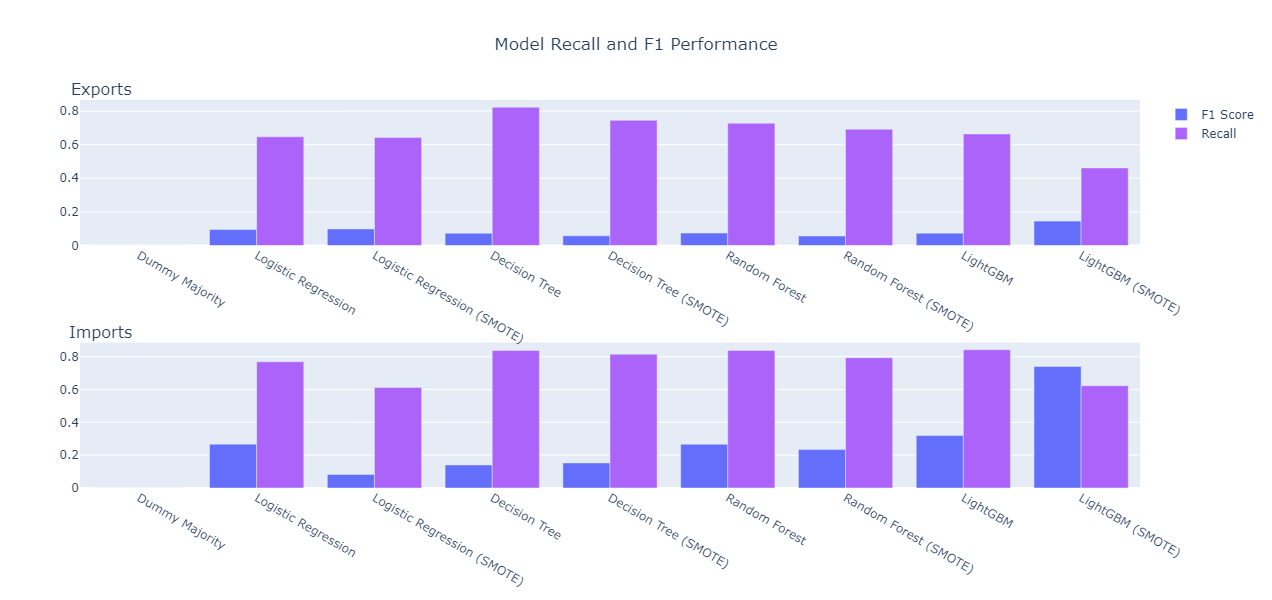

In [93]:
fig = make_subplots(rows=2,cols=1, subplot_titles=("Exports","Imports"), vertical_spacing=.25)

# export
trace1 = go.Bar(name='F1 Score', x=all_model_names, y=export_f1, marker_color="#636efa")
trace2 = go.Bar(name='Recall', x=all_model_names, y=export_recall, marker_color="#ab63fa")
# import
trace3 = go.Bar(showlegend=False, x=all_model_names, y=import_f1, marker_color="#636efa")
trace4 = go.Bar(showlegend=False, x=all_model_names, y=import_recall, marker_color="#ab63fa")

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,1)

fig.append_trace(trace3, 2,1)
fig.append_trace(trace4, 2,1)

fig.update_layout(height=600, width = 1600, title={"text":"Model Recall and F1 Performance", "x":.5})
fig.update_annotations(x=.02, selector={"text":"Exports"})
fig.update_annotations(x=.02, selector={"text":"Imports"})
fig.show()

In [19]:
from sklearn import tree
import graphviz
from IPython.display import display

In [20]:
#dot_data = tree.export_graphviz(export_dt_pipe.best_estimator_.named_steps['clf'], out_file=None) 
dot_data = tree.export_graphviz(import_dt_pipe.best_estimator_.named_steps['clf'], out_file=None, 
                                feature_names=feature_cols,
                                class_names=["Clear","Seize"],
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("import_dt")

'import_dt.pdf'

In [21]:
import_lgbm_pipe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('targetEncoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(),
                                                                         ['species_code',
                                                                          'wildlf_desc',
                                                                          'wildlf_cat',
                                                                          'ctry_org',
                                                                          'ctry_ie',
                                                                          'purp',
                                                                          'src',
                                                                          'trans_mode',
                                                                          'pt_cd',
                                                                          'ship_date_mm'])])),
                                       ('standardScaler', StandardScaler()),
                                       ('clf',
                                        LGBMClassifier(random_state=42,
                                                       verbose=-1))]),
             param_grid={'clf__is_unbalance': [True, False],
                         'clf__learning_rate': [0.05, 0.1],
                         'clf__max_depth': [5, 10, 15, 20, -1],
                         'clf__n_estimators': [500, 1000],
                         'clf__num_leaves': [10, 20, 50, 70]},
             scoring='recall', verbose=3)

In [29]:
col_names = ["Data Set","Metric"] + all_model_names
row1 = ["Import","

In [40]:
score_df = pd.DataFrame(columns=col_names)
row1 = ['Export','F1'] + export_f1
row2 = ['Export','Recall'] + export_recall
row3 = ['Import', 'F1'] + import_f1
row4 = ['Import','Recall'] + import_recall
score_df.loc[len(score_df)] = row1
score_df.loc[len(score_df)] = row2
score_df.loc[len(score_df)] = row3
score_df.loc[len(score_df)] = row4
score_df.round(3)

,Data Set,Metric,Dummy Majority,Logistic Regression,Logistic Regression (SMOTE),Decision Tree,Decision Tree (SMOTE),Random Forest,Random Forest (SMOTE),LightBGM,LightBGM (SMOTE)
0,Export,F1,0.0,0.095,0.099,0.073,0.057,0.074,0.057,0.074,0.145
1,Export,Recall,0.0,0.647,0.642,0.823,0.745,0.728,0.692,0.664,0.462
2,Import,F1,0.0,0.267,0.082,0.140,0.153,0.267,0.234,0.319,0.740
3,Import,Recall,0.0,0.769,0.612,0.838,0.816,0.838,0.793,0.842,0.623


In [46]:
import_X_test.head()

,species_code,wildlf_desc,wildlf_cat,ctry_org,ctry_ie,purp,src,trans_mode,pt_cd,value,ship_date_mm
756428,DEBR,LIV,FSH,ID,ID,T,W,A,LA,1.0,11
325122,ACTE,LIV,COR,TW,TW,T,C,A,LA,579.0,9
1763495,NONV,BOD,OIV,XX,CN,T,U,M,SF,90.0,3
900000,HOBU,SHO,REP,ID,CH,T,C,A,NW,8754.0,8
60764,PVL?,LIV,COR,FM,MH,T,C,A,TP,153.0,5


In [ ]:
# # read in the joblibs
# path = "gridsearch_all_models"
# # logistic regression
# export_lr_pipe = joblib.load(f'{path}/export_lr_pipe.joblib')
# export_smote_lr_pipe = joblib.load(f'{path}/export_SMOTE_lr_pipe.joblib')
# import_lr_pipe = joblib.load(f'{path}/import_lr_pipe.joblib')
# import_smote_lr_pipe = joblib.load(f'{path}/export_SMOTE_lr_pipe.joblib')
# # decision tree
# export_dt_pipe = joblib.load(f'{path}/export_dt_pipe.joblib')
# export_smote_dt_pipe = joblib.load(f'{path}/export_SMOTE_dt_pipe.joblib')
# import_dt_pipe = joblib.load(f'{path}/import_dt_pipe.joblib')
# import_smote_dt_pipe = joblib.load(f'{path}/import_SMOTE_dt_pipe.joblib')
# # random forest
# export_rf_pipe = joblib.load(f'{path}/export_rf_pipe.joblib')
# export_smote_rf_pipe = joblib.load(f'{path}/export_SMOTE_rf_pipe.joblib')
# import_rf_pipe = joblib.load(f'{path}/import_rf_pipe.joblib')
# import_smote_rf_pipe = joblib.load(f'{path}/import_SMOTE_rf_pipe.joblib')
# # lgbm
# export_lgbm_pipe = joblib.load(f'{path}/lgbm_export.joblib')
# export_smote_lgbm_pipe = joblib.load(f'{path}/lgbm_export_SMOTE.joblib')
# import_lgbm_pipe = joblib.load(f'{path}/lgbm_pipe_import.joblib')
# import_smote_lgbm_pipe = joblib.load(f'{path}/lgbm_import_SMOTE.joblib') # still running

In [50]:
# imports
# regression
import_reg_preds = import_lr_pipe.predict(import_X_test)
import_reg_smote_preds = import_smote_lr_pipe.predict(import_X_test)
# decision tree
import_dt_preds = import_dt_pipe.predict(import_X_test)
import_dt_smote_preds = import_smote_dt_pipe.predict(import_X_test)
# random forest
import_rf_preds = import_rf_pipe.predict(import_X_test)
import_rf_smote_preds = import_smote_rf_pipe.predict(import_X_test)
# lgbm
import_lgbm_preds = import_lgbm_pipe.predict(import_X_test)
import_lgbm_smote_preds = import_smote_lgbm_pipe.predict(import_X_test)
# exports
# regression
export_reg_preds = export_lr_pipe.predict(export_X_test)
export_reg_smote_preds = export_smote_lr_pipe.predict(export_X_test)
# decision tree
export_dt_preds = export_dt_pipe.predict(export_X_test)
export_dt_smote_preds = export_smote_dt_pipe.predict(export_X_test)
# random forest
export_rf_preds = export_rf_pipe.predict(export_X_test)
export_rf_smote_preds = export_smote_rf_pipe.predict(export_X_test)
# lgbm
export_lgbm_preds = export_lgbm_pipe.predict(export_X_test)
export_lgbm_smote_preds = export_smote_lgbm_pipe.predict(export_X_test)

In [52]:
predicted_df_import = import_X_test.copy()
predicted_df_export = export_X_test.copy()
predicted_df_import['y'] = import_y_test
predicted_df_export['y'] = export_y_test

predicted_df_import['import_lr'] = import_reg_preds
predicted_df_import['import_lr_smote'] = import_reg_smote_preds
predicted_df_import['import_dt'] = import_dt_preds
predicted_df_import['import_dt_smote'] = import_dt_smote_preds
predicted_df_import['import_rf'] = import_rf_preds
predicted_df_import['import_rf_smote'] = import_rf_smote_preds
predicted_df_import['import_lgbm'] = import_lgbm_preds
predicted_df_import['import_lgbm_smote'] = import_lgbm_smote_preds


predicted_df_export['export_lr'] = export_reg_preds
predicted_df_export['export_lr_smote'] = export_reg_smote_preds
predicted_df_export['export_dt'] = export_dt_preds
predicted_df_export['export_dt_smote'] = export_dt_smote_preds
predicted_df_export['export_rf'] = export_rf_preds
predicted_df_export['export_rf_smote'] = export_rf_smote_preds
predicted_df_export['export_lgbm'] = export_lgbm_preds
predicted_df_export['export_lgbm_smote'] = export_lgbm_smote_preds

In [53]:
predicted_df_import.head()

,species_code,wildlf_desc,wildlf_cat,ctry_org,ctry_ie,purp,src,trans_mode,pt_cd,value,ship_date_mm,y,import_lr,import_lr_smote,import_dt,import_dt_smote,import_rf,import_rf_smote,import_lgbm,import_lgbm_smote
756428,DEBR,LIV,FSH,ID,ID,T,W,A,LA,1.0,11,0,0,1,0,0,0,0,0,0
325122,ACTE,LIV,COR,TW,TW,T,C,A,LA,579.0,9,0,0,1,0,0,0,0,0,0
1763495,NONV,BOD,OIV,XX,CN,T,U,M,SF,90.0,3,1,1,1,1,1,1,1,1,1
900000,HOBU,SHO,REP,ID,CH,T,C,A,NW,8754.0,8,0,0,0,0,0,0,0,0,0
60764,PVL?,LIV,COR,FM,MH,T,C,A,TP,153.0,5,0,0,0,1,0,0,1,0,0


In [54]:
predicted_df_export.head()

,species_code,wildlf_desc,wildlf_cat,ctry_org,ctry_ie,purp,src,trans_mode,pt_cd,value,ship_date_mm,y,export_lr,export_lr_smote,export_dt,export_dt_smote,export_rf,export_rf_smote,export_lgbm,export_lgbm_smote
1017027,MATF,LIV,TFS,VS,CA,T,W,A,LA,801.0,5,0,0,0,0,0,0,0,0,0
28992,PIMX,SPR,MOL,AU,AE,T,R,A,SE,957.0,4,0,0,0,0,0,0,0,0,0
451713,MATF,LIV,TFS,VS,TW,T,W,A,HA,3841.0,1,0,0,0,0,0,0,0,0,0
605610,PBXC,LIV,MAM,CO,CO,P,C,P,MI,500.0,3,0,0,0,0,0,0,1,0,0
620372,VIPR,SPE,REP,US,BR,T,F,A,NY,26021.0,1,0,0,0,0,0,0,0,0,0


In [55]:
predicted_df_export.shape

(74835, 20)

In [63]:
export_err = predicted_df_export.loc[(predicted_df_export['y'] != predicted_df_export['export_lr']) | (predicted_df_export['y'] != predicted_df_export['export_lr_smote']) | 
                       (predicted_df_export['y'] != predicted_df_export['export_dt']) | (predicted_df_export['y'] != predicted_df_export['export_dt_smote']) |
                       (predicted_df_export['y'] != predicted_df_export['export_rf']) | (predicted_df_export['y'] != predicted_df_export['export_rf_smote'])|
                       (predicted_df_export['y'] != predicted_df_export['export_lgbm']) | (predicted_df_export['y'] != predicted_df_export['export_lgbm_smote'])]

In [65]:
import_err = predicted_df_import.loc[(predicted_df_import['y'] != predicted_df_import['import_lr']) | (predicted_df_import['y'] != predicted_df_import['import_lr_smote']) | 
                       (predicted_df_import['y'] != predicted_df_import['import_dt']) | (predicted_df_import['y'] != predicted_df_import['import_dt_smote']) |
                       (predicted_df_import['y'] != predicted_df_import['import_rf']) | (predicted_df_import['y'] != predicted_df_import['import_rf_smote'])|
                       (predicted_df_import['y'] != predicted_df_import['import_lgbm']) | (predicted_df_import['y'] != predicted_df_import['import_lgbm_smote'])]

In [67]:
export_err.to_csv("export_errors.csv")

In [73]:
predicted_df_export.shape

(74835, 20)

In [74]:
export_err.shape

(26518, 20)

In [68]:
import_err.to_csv("import_errors.csv")

In [69]:
import_err.shape

(157481, 20)

In [71]:
predicted_df_import.loc[predicted_df_import['y']==0].shape

(391116, 20)

In [72]:
predicted_df_import.loc[predicted_df_import['y']==1].shape

(6511, 20)

In [75]:
predicted_df_import

,species_code,wildlf_desc,wildlf_cat,ctry_org,ctry_ie,purp,src,trans_mode,pt_cd,value,ship_date_mm,y,import_lr,import_lr_smote,import_dt,import_dt_smote,import_rf,import_rf_smote,import_lgbm,import_lgbm_smote
756428,DEBR,LIV,FSH,ID,ID,T,W,A,LA,1.0,11,0,0,1,0,0,0,0,0,0
325122,ACTE,LIV,COR,TW,TW,T,C,A,LA,579.0,9,0,0,1,0,0,0,0,0,0
1763495,NONV,BOD,OIV,XX,CN,T,U,M,SF,90.0,3,1,1,1,1,1,1,1,1,1
900000,HOBU,SHO,REP,ID,CH,T,C,A,NW,8754.0,8,0,0,0,0,0,0,0,0,0
60764,PVL?,LIV,COR,FM,MH,T,C,A,TP,153.0,5,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587600,HIPN,TRO,MAM,ZA,ZA,H,W,A,CH,225.0,8,0,0,1,0,0,0,0,0,0
1318755,GEMS,TRO,MAM,ZA,ZA,H,W,A,NY,858.0,11,0,0,1,0,0,0,0,0,0
1522394,ELKK,TRO,MAM,AR,AR,H,W,A,CH,200.0,12,0,0,1,0,0,0,0,0,0
1220652,HOBU,SHO,REP,ID,IT,T,C,A,NY,1042.0,10,0,0,0,0,0,0,0,0,0
